In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Real = pd.read_csv("True.csv")
Fake = pd.read_csv("Fake.csv")

In [3]:
Real['news_category'] = 1
Fake['news_category'] = 0

In [4]:
data = pd.concat([Real, Fake])

In [5]:
data = data.reset_index(drop=True)

In [6]:
from sklearn.utils import shuffle
data = shuffle(data)

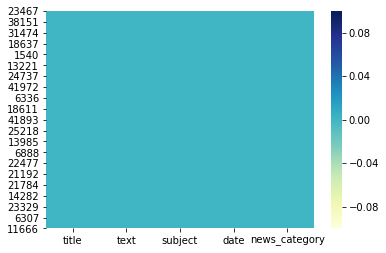

In [8]:
sns.heatmap(data.isnull(), cmap="YlGnBu")

In [15]:
data.groupby('news_category').subject.describe()

,count,unique,top,freq
news_category,,,,
0,23481,6,News,9050
1,21417,2,politicsNews,11272


In [24]:
pd.set_option('display.max_colwidth', 500)
data.groupby('news_category')['subject'].unique()

news_category
0    [News, left-news, politics, Middle-east, Government News, US_News]
1                                             [worldnews, politicsNews]
Name: subject, dtype: object

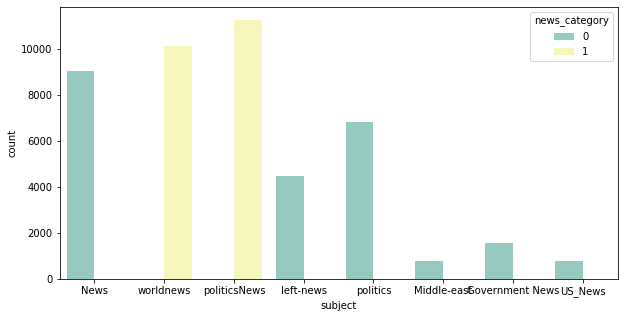

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x= "subject", hue = "news_category", data=data, palette="Set3")

In [29]:
data.head(1)

,title,text,subject,date,news_category
23467,WATCH: Sean Spicer Loses His Sh*t When Reporters Grill Him About Trump’s Ties To Russia,"Donald Trump s White House mouthpiece just gave Melissa McCarthy more material to work with on Saturday Night Live.As we all know, FBI Director James Comey revealed during testimony under oath that Trump is being investigated for colluding with Russia during the 2016 Election and has been under investigation for months. Comey also confirmed that Trump s wiretapping accusation against President Obama is bullshit.These revelations have given the White House Press Corps a lot of questions to as...",News,"March 22, 2017",0


In [30]:
data['text'] = data['title'] + " " + data['text']

In [31]:
del data['title']
del data['date']

In [35]:
data['count_of_words'] = data.text.apply(lambda x: len(x.split()))

In [37]:
data['count_of_uppercase_words'] = data.text.apply(lambda x: len([word for word in x.split() if word.istitle()]))

In [39]:
data['count_of_characters'] = data['text'].apply(len)

In [41]:
data['avg_len_of_words'] = data['count_of_characters'] / data['count_of_words']

In [51]:
import string
data['punctuation_count'] = data['text'].apply(lambda x: len("".join(p for p in x if p in string.punctuation)))

In [59]:
#len("".join(p for p in data['text'][23467] if p in string.punctuation))

In [66]:
from textblob import TextBlob

In [84]:
del data['noun_count']
del data['verb_count']
del data['adj_count']
del data['adv_count']
del data['pron_count']

In [86]:
'''def NounCounter(x):
    nouns = []
    for (word, pos) in x:
        if pos.startswith("NN"):
            nouns.append(word)
    return nouns'''

In [101]:
'''data["pos_tag"] = data['text'].apply(TextBlob)

#data.text.apply(lambda x: len(x.split()))
#data["nouns"] = data["pos_tag"].apply(NounCounter)
#data["noun_count"] = df["nouns"].str.len()'''

In [104]:
#data["pos_tag_tags"] = data["pos_tag"].apply(pos_tag.tags)

NameError: name 'pos_tag' is not defined

In [106]:
del data['pos_tag']
data.head(1)

,text,subject,news_category,count_of_words,count_of_uppercase_words,count_of_characters,avg_len_of_words,punctuation_count
23467,"WATCH: Sean Spicer Loses His Sh*t When Reporters Grill Him About Trump’s Ties To Russia Donald Trump s White House mouthpiece just gave Melissa McCarthy more material to work with on Saturday Night Live.As we all know, FBI Director James Comey revealed during testimony under oath that Trump is being investigated for colluding with Russia during the 2016 Election and has been under investigation for months. Comey also confirmed that Trump s wiretapping accusation against President Obama is b...",News,0,524,90,3049,5.818702,58


In [108]:
k = "As we all know, FBI Director James Comey revealed during testimony under oath that Trump is being investigated for colluding with Russia during the 2016 Election and has been under investigation for months"

In [110]:
kpos = TextBlob(k)

In [171]:
#kpos.tags

In [119]:
pos_family = {'noun' : ['NN','NNS','NNP','NNPS'],'pron' : ['PRP','PRP$','WP','WP$'],
              'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],'adj' :  ['JJ','JJR','JJS'],
              'adv' : ['RB','RBR','RBS','WRB']}

In [120]:
def check_pos_tag(x, flag):
    cnt = 0
    wiki = TextBlob(x)
    for tup in wiki.tags:
        ppo = list(tup)[1]
        if ppo in pos_family[flag]:
            cnt += 1
    return cnt

In [112]:
check_pos_tag(k, 'noun')

11

In [113]:
data['noun_count'] = data.text.apply(lambda x: check_pos_tag(x, 'noun'))

In [172]:
#data.head(1)

In [115]:
z = data['text'][23467]

In [117]:
ztag = TextBlob(z)

In [118]:
check_pos_tag(z, 'noun')

158

In [121]:
data['verb_count'] = data.text.apply(lambda x: check_pos_tag(x, 'verb'))

In [123]:
check_pos_tag(z, 'verb')

120

In [124]:
%time data['adjective_count'] = data.text.apply(lambda x: check_pos_tag(x, 'adj'))

CPU times: user 26min 10s, sys: 32.6 s, total: 26min 43s
Wall time: 29min 20s


In [125]:
%time data['adverb_count'] = data.text.apply(lambda x: check_pos_tag(x, 'adv'))

CPU times: user 24min 58s, sys: 29.6 s, total: 25min 28s
Wall time: 28min


In [126]:
%time data['pronoun_count'] = data.text.apply(lambda x: check_pos_tag(x, 'pron'))

CPU times: user 23min 17s, sys: 24.2 s, total: 23min 41s
Wall time: 25min 12s


In [129]:
#data.head(1)

In [128]:
check_pos_tag(z, 'adj'), check_pos_tag(z, 'adv'), check_pos_tag(z, 'pron')

(26, 31, 43)

In [130]:
data.columns

Index(['text', 'subject', 'news_category', 'count_of_words',
       'count_of_uppercase_words', 'count_of_characters', 'avg_len_of_words',
       'punctuation_count', 'noun_count', 'verb_count', 'adjective_count',
       'adverb_count', 'pronoun_count'],
      dtype='object')

case conversion
remove accented characters
Expanding contractions
Remove numbers, symbols and special characters
lemmatization
stopword removal


In [131]:
data['text'] = data['text'].str.lower()

In [132]:
import unicodedata

def remove_accented_char(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [133]:
data['text'] = data['text'].apply(remove_accented_char)

In [134]:
import contractions
def fix_contractions(text):
    text = contractions.fix(text)
    return text

In [135]:
data['text'] = data['text'].apply(fix_contractions)

In [136]:
import re

def remove_sym_specialchar(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'', text)
    return text

In [137]:
data['text'] = data['text'].apply(remove_sym_specialchar)

In [140]:
#pd.set_option('display.max_colwidth', 50)
#data.head()

In [141]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [143]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet

def pos_tag_wordnet(tagged_tokens):
    tag_map = {'j':wordnet.ADJ, 'v':wordnet.VERB, 'n':wordnet.NOUN, 'r':wordnet.ADV}
    new_tagged_tokens = [(word, tag_map.get(tag[0].lower(), wordnet.NOUN, )) for word, tag in tagged_tokens]
    return new_tagged_tokens

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kavitasurasura/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [144]:
def wordnet_lemmatize_text(text):
    # tokenizing and parts of speech tagging
    tagged_tokens = nltk.pos_tag(nltk.word_tokenize(text))
    # convert pos tags to wordnet tags
    wordnet_tokens = pos_tag_wordnet(tagged_tokens)
    lemmatized_text = ' '.join(wnl.lemmatize(word, tag) for word, tag in wordnet_tokens)
    return lemmatized_text

In [145]:
data['text'] = data['text'].apply(wordnet_lemmatize_text)

In [146]:
def remove_stopwords(text, is_lower_case=False, stopwords=None):
    if not stopwords:
        stopwords = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [147]:
stop_words = nltk.corpus.stopwords.words('english')

data['text'] = data['text'].apply(remove_stopwords)

In [149]:
#TF:IDF 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=.02, max_df=.7, ngram_range=[1,3])

%time data_tfidf = tfidf_vectorizer.fit_transform(data['text'])
display("TF:IDF :", data_tfidf.shape)
df_tfidf = pd.DataFrame(data_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names(), index=data.index)
display(df_tfidf.head())

CPU times: user 2min, sys: 5.38 s, total: 2min 6s
Wall time: 2min 10s


'TF:IDF :'

(44898, 1666)

,10,100,11,12,13,14,15,16,17,18,...,yous,yous government,yous house,yous official,yous president,yous president donald,yous presidential,yous senate,yous senator,zone
23467,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
17147,0.053549,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
9694,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.073740,0.0,0.0,0.0,0.0,0.0,0.09116,0.0,0.0,0.0
7276,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.042018,0.0,0.0,...,0.018981,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
15585,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0


In [150]:
#TF:IDF embedded data for Classification
df_tfidf_combined = pd.concat([data, df_tfidf], axis = 1)

In [154]:
df_tfidf_combined.head(1)

,text,subject,news_category,count_of_words,count_of_uppercase_words,count_of_characters,avg_len_of_words,punctuation_count,noun_count,verb_count,...,yous,yous government,yous house,yous official,yous president,yous president donald,yous presidential,yous senate,yous senator,zone
23467,watch sean spicer lose sht reporter grill trum...,News,0,524,90,3049,5.818702,58,158,120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
df_tfidf_combined.drop(columns=['text'], inplace = True)
print(df_tfidf_combined.shape)
display(df_tfidf_combined.head())
display(df_tfidf_combined.tail())

(44898, 1678)


,subject,news_category,count_of_words,count_of_uppercase_words,count_of_characters,avg_len_of_words,punctuation_count,noun_count,verb_count,adjective_count,...,yous,yous government,yous house,yous official,yous president,yous president donald,yous presidential,yous senate,yous senator,zone
23467,News,0,524,90,3049,5.818702,58,158,120,26,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
17147,worldnews,1,410,70,2521,6.148780,36,136,67,33,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
9694,politicsNews,1,406,71,2461,6.061576,53,165,71,41,...,0.073740,0.0,0.0,0.0,0.0,0.0,0.09116,0.0,0.0,0.0
7276,politicsNews,1,1013,161,6304,6.223100,117,386,184,98,...,0.018981,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
15585,worldnews,1,106,24,669,6.311321,15,45,18,11,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0


,subject,news_category,count_of_words,count_of_uppercase_words,count_of_characters,avg_len_of_words,punctuation_count,noun_count,verb_count,adjective_count,...,yous,yous government,yous house,yous official,yous president,yous president donald,yous presidential,yous senate,yous senator,zone
35621,politics,0,279,53,1724,6.179211,41,120,43,17,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
12710,worldnews,1,583,85,3707,6.358491,80,192,102,57,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
12613,worldnews,1,508,93,3106,6.114173,90,183,72,37,...,0.026041,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
44601,Middle-east,0,162,36,1201,7.413580,56,86,15,24,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7054,politicsNews,1,110,15,642,5.836364,13,47,19,7,...,0.061567,0.0,0.0,0.0,0.111772,0.0,0.0,0.0,0.0,0.0


In [159]:
import pycaret
from pycaret.classification import *

In [161]:
exp1 = setup(data = df_tfidf_combined, target = 'news_category')

IntProgress(value=0, description='Processing: ', max=13)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:45:37
Status,. . . . . . . . . . . . . . . . . .,Preparing Data for Modeling
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


AttributeError: 'DataFrame' object has no attribute 'dtype'

In [170]:
#pd.set_option('display.max_rows', 2000)
df_tfidf_combined.dtypes.value_counts()

float64    1667
int64        10
object        1
dtype: int64